[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/04_population_single_3/stochastic_simulation_logistic.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulation of the stochastic logistic equations, based on "Modelling biological populations in space and time", Eric Renshaw

In [2]:
# Set parameters for logistic equation: X_t=R*X*(1-X/K)
R = 1.0
K  = 50
dimP = K*10 # number of points at which pdf is defined, need to be larger than carrying capacity:

# Corresponding birth-death probability, see lecture notes for the mapping
mu = R/K
lam = R*(1-(1/K))
 
# Simulate the stochastic logistic equation, using section 3.4
nsteps = 2500
N = np.zeros(nsteps)
N[0] = 3
t = 0
dt = 10**(-3)

In [3]:
# Think about what happens if dt is too large, and why?
while t < nsteps-1 and N[t] > 0:
    r = np.random.rand(1)
    if r < lam*N[t]*dt:
        N[t+1] = N[t]+1
    elif r < (lam*N[t] + mu*N[t]*(N[t]-1))*dt:
        N[t+1] = N[t]-1
    else:
        N[t+1] = N[t]
    t = t+1

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

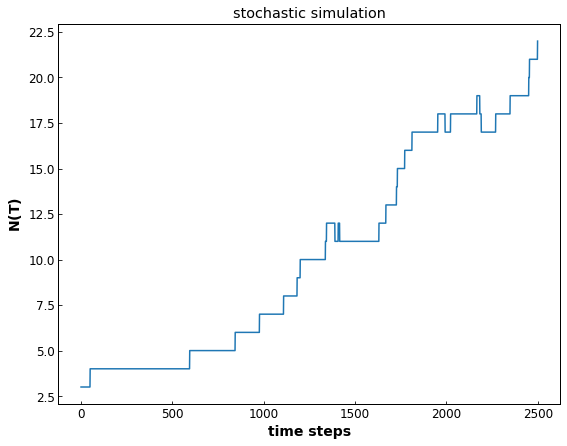

In [5]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(np.arange(nsteps), N, linewidth=1.5)

# Set title and axes labels
ax.set_title('stochastic simulation')
ax.set_xlabel('time steps')
ax.set_ylabel(r'$N(T)$')

plt.show()